# 1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

# for Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

# import several machine learning algorithms
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to evaluate the models
from sklearn.metrics import roc_auc_score

# to separate data into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# display various ranges 
pd.options.display.float_format = '{:.4f}'.format

print("Setup complete...")

Setup complete...


----------------------------------------------------------------------

# 2. Import dataset

### 2.1 Lending Club

In [3]:
df1 = pd.read_csv('loan.csv')
print(df1.shape)
df1.head()

(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,nan,nan,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.2400,0.0000,Apr-2001,1.0000,nan,45.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,0.0000,16901.0000,2.0000,2.0000,1.0000,2.0000,2.0000,12560.0000,69.0000,2.0000,7.0000,2137.0000,28.0000,42000.0000,1.0000,11.0000,2.0000,9.0000,1878.0000,34360.0000,5.9000,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,nan,2.0000,nan,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,nan,nan,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.5200,0.0000,Jun-1987,0.0000,71.0000,75.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,1208.0000,321915.0000,4.0000,4.0000,2.0000,3.0000,3.0000,87153.0000,88.0000,4.0000,5.0000,998.0000,57.0000,50800.0000,2.0000,15.0000,2.0000,10.0000,24763.0000,13761.0000,8.3000,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,nan,4.0000,nan,0.0000,2.0000,4.0000,4.0000,9.0000,

### 2.2. Titanic

In [4]:
df2 = pd.read_csv('Train_Titanic.csv')
print(df2.shape)
df2.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


### 2.3 House price

In [5]:
df3 = pd.read_csv('houseprice.csv')
print(df3.shape)
df3.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2.4. Boston house price

In [6]:
boston_dataset = load_boston()
df4 = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
print(df4.shape)
df4.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [29]:
org_df1 = df1.copy()
org_df2 = df2.copy()
org_df3 = df3.copy()
org_df4 = df4.copy()

----------------------------------------------------------------------

# 5. Discretisation

## 5.1. Introduction

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values.

#### Discretisation helps handle outliers and highly skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.


#### Discretisation approaches

There are several approaches to transform continuous variables into discrete ones. This process is also known as **binning**, with each bin being each  interval. Discretisation methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.

#####     a) Unsupervised discretisation methods

- Equal width binning
- Equal frequency binning


#####    b) Supervised discretisation methods

- Discretisation using decision trees


In this lecture, I will describe **equal frequency discretisation**, and in the following sections I will expand on the other methods to make variables discrete.


## 5.2. Equal frequency discretisation

Equal frequency binning divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. Typically, we find the interval boundaries by determining the quantiles.

Equal frequency discretisation using quantiles consists of **dividing the continuous variable into N quantiles, N to be defined by the user**. There is no rule of thumb to define N. However, if we think of the discrete variable as a categorical variable, where each bin is a category, we would like to keep N (the number of categories) low (typically no more than 10).

Equal frequency binning is straightforward to implement and by spreading the values of the observations more evenly it may help boost the algorithm's performance. On the other hand, this arbitrary binning may also disrupt the relationship with the target on occasions. Therefore, whenever possible, it will bring value to examine whether this type of binning is the right strategy, and it will depend on the variable and the algorithm that we want to use to make the predictions.

In [8]:
usecols = ['Age', 'Fare', 'Survived']
df2 = org_df2.copy()
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(df2[usecols],df2.Survived, test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

The variable Age contains missing data, that I will fill by extracting a random sample of the variable.

In [10]:
def impute_na(data, variable):
    # function to fill NA with a random sample
    
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

# replace NA in both train and test sets
X_train['Age'] = impute_na(df2, 'Age')
X_test['Age'] = impute_na(df2, 'Age')

### 5.2.1. Age

#### Original distribution

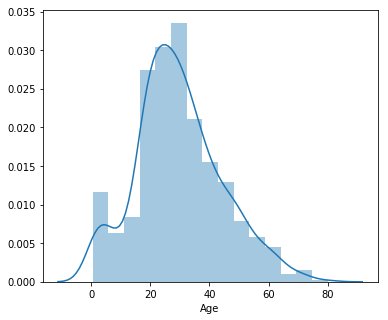

In [12]:
plt.figure(figsize=(6,5))
sns.distplot(df2['Age'], kde=True, bins=15)

**How does survival correlate with Age?**

We can determine the relation between survival and Age by plotting the mean survival per Age. In this case, I will calculate the Survival rate per each year of Age. See below.

Text(0,0.5,'Survived')

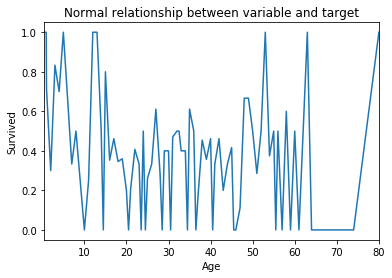

In [13]:
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

By looking at the plot, we get an intuition that younger people (children) were more likely to survive (see higher survival rates at ages below 10 and 10-15). However, it looks like children of 10 years of age, had a very low survival chance. This does not make a lot of sense and most likely indicates that our 10 year old sample is not big enough and then the survival rate is underestimated. Let's see below.

Text(0,0.5,'Survived')

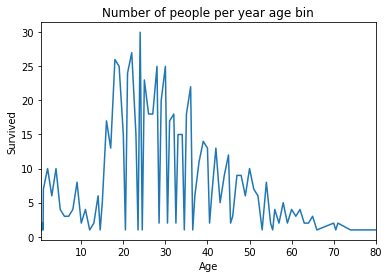

In [14]:
# here I plot the number of passengers within each 1 year age bucket / bin
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].count().plot()
fig.set_title('Number of people per year age bin')
fig.set_ylabel('Survived')

As we suspected, **there were very few children at the age of 10** on the Titanic. If none of them or only half of the 10 year old children survived, we would be led to think that being 10 years old decreased your chances of survival, when in reality, there were only 2 children of the age that were not lucky enough  to survive, therefore leading to underestimation of survival rate.

By grouping Age into bins, we can get a better view of the survival rate depending on the Age of the passenger. Let's see below.

#### Discretisation with quantiles

In [15]:
# Divide Age in 5 bins, use the qcut (quantile cut) function from pandas and I indicate that I want 4 cutting points, thus 5 bins.
# retbins= True indicates that I want to capture the limits of each interval (so I can then use them to cut the test set)

Age_disccretised, intervals = pd.qcut(df2.Age, 4, labels=None, retbins=True, precision=3, duplicates='raise')
pd.concat([Age_disccretised, df2.Age], axis=1).head(10)

,Age,Age
0,"(20.125, 28.0]",22.0000
1,"(28.0, 38.0]",38.0000
2,"(20.125, 28.0]",26.0000
3,"(28.0, 38.0]",35.0000
4,"(28.0, 38.0]",35.0000
5,NaN,nan
6,"(38.0, 80.0]",54.0000
7,"(0.419, 20.125]",2.0000
8,"(20.125, 28.0]",27.0000
9,"(0.419, 20.125]",14.0000


We can see in the above output how by discretising using quantiles, we placed each Age observation within one interval. For example, age 22 was placed in the 20-28 interval, whereas age 38 was placed into the 28-28 interval. We can visualise the interval cut points below.

In [16]:
intervals

array([ 0.42 , 20.125, 28.   , 38.   , 80.   ])

And because we generated the bins using the quantile cut method, we should have roughly the same amount of observations per bin. See below.

In [18]:
# calculate number of passengers per bin
temp = pd.concat([Age_disccretised, df2.Age], axis=1)
temp.columns = ['Age_discretised', 'Age']
temp.groupby('Age_discretised')['Age'].count()

Age_discretised
(0.419, 20.125]    179
(20.125, 28.0]     183
(28.0, 38.0]       175
(38.0, 80.0]       177
Name: Age, dtype: int64

In [19]:
# we can also add labels instead of having the interval boundaries, to the bins, as follows:

Age_disccretised, intervals = pd.qcut(df2.Age, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'], retbins=True, precision=3, duplicates='raise')
Age_disccretised.head()

0    Q2
1    Q3
2    Q2
3    Q3
4    Q3
Name: Age, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [20]:
# and now, I will divide into 10 quantiles for the rest of the exercise. I will leave the quantile
# boundary and generate labels as well for comparison

# create 10 labels, one for each quantile
labels = ['Q'+str(i+1) for i in range(0,10)]
print(labels)

# bins with labels
X_train['Age_disc_label'], bins = pd.qcut(x=X_train.Age, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['Age_disc'], bins = pd.qcut(x=X_train.Age, q=10, retbins=True, precision=3, duplicates='raise')


X_train.head(10)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']


,Age,Fare,Survived,Age_disc_label,Age_disc
857,51.0000,26.5500,1,Q10,"(49.0, 80.0]"
52,49.0000,76.7292,1,Q9,"(41.6, 49.0]"
386,1.0000,46.9000,0,Q1,"(0.669, 13.2]"
124,54.0000,77.2875,0,Q10,"(49.0, 80.0]"
578,14.5000,14.4583,0,Q2,"(13.2, 19.0]"
549,8.0000,36.7500,1,Q1,"(0.669, 13.2]"
118,24.0000,247.5208,0,Q4,"(22.0, 26.0]"
12,20.0000,8.0500,0,Q3,"(19.0, 22.0]"
157,30.0000,8.0500,0,Q6,"(29.0, 32.0]"
127,24.0000,7.1417,1,Q4,"(22.0, 26.0]"


Age 51 was placed into the 49-80 bucket, which is also the last bucket (Q10) in our distribution, as it contains the majority of the elder people. The age of 8 was placed into the 0-13 bucket, which is the first interval (Q1) of the discretised variable. And below the interval limits.

In [21]:
bins

array([ 0.67, 13.2 , 19.  , 22.  , 26.  , 29.  , 32.  , 36.  , 41.6 ,
       49.  , 80.  ])

To divide the test set, we will use the cut method of pandas, and we will pass the interval edges above. 

As with all feature engineering methods, the limits of the intervals should be set on the training set, and then propagated to the test set. We should not calculate the quantiles in the test set. We should use the limits estimated using the train set data. If the distributions are similar, we should expect to have roughly the same amount of observations in each age bucket in the test set as well.

In [22]:
# we use pandas cut method and pass the quantile edges calculated in the training set
X_test['Age_disc_label'] = pd.cut(x = X_test.Age, bins=bins, labels=labels)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=bins)

X_test.head()

,Age,Fare,Survived,Age_disc_label,Age_disc
495,42.0000,14.4583,0,Q9,"(41.6, 49.0]"
648,18.0000,7.5500,0,Q2,"(13.2, 19.0]"
278,7.0000,29.1250,0,Q1,"(0.67, 13.2]"
31,35.0000,146.5208,1,Q7,"(32.0, 36.0]"
255,29.0000,15.2458,1,Q5,"(26.0, 29.0]"


In [23]:
# let's check that we have equal frequency (equal number of observations per bin)
X_test.groupby('Age_disc')['Age'].count()

Age_disc
(0.67, 13.2]    26
(13.2, 19.0]    38
(19.0, 22.0]    24
(22.0, 26.0]    33
(26.0, 29.0]    21
(29.0, 32.0]    25
(32.0, 36.0]    22
(36.0, 41.6]    22
(41.6, 49.0]    23
(49.0, 80.0]    32
Name: Age, dtype: int64

#### Discretisation by quantiles guarantees same number of observations in each partition/bin/interval

In [24]:
t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t1

Age_disc
(0.669, 13.2]   0.1011
(13.2, 19.0]    0.1156
(19.0, 22.0]    0.0883
(22.0, 26.0]    0.1140
(26.0, 29.0]    0.0995
(29.0, 32.0]    0.0883
(32.0, 36.0]    0.1091
(36.0, 41.6]    0.0835
(41.6, 49.0]    0.1059
(49.0, 80.0]    0.0947
Name: Survived, dtype: float64

In [25]:
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
t2

Age_disc
(0.67, 13.2]   0.0970
(13.2, 19.0]   0.1418
(19.0, 22.0]   0.0896
(22.0, 26.0]   0.1231
(26.0, 29.0]   0.0784
(29.0, 32.0]   0.0933
(32.0, 36.0]   0.0821
(36.0, 41.6]   0.0821
(41.6, 49.0]   0.0858
(49.0, 80.0]   0.1194
Name: Survived, dtype: float64

In [26]:
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp

,train,test
Age_disc,,
"(0.669, 13.2]",0.1011,nan
"(0.67, 13.2]",nan,0.0970
"(13.2, 19.0]",0.1156,0.1418
"(19.0, 22.0]",0.0883,0.0896
"(22.0, 26.0]",0.1140,0.1231
"(26.0, 29.0]",0.0995,0.0784
"(29.0, 32.0]",0.0883,0.0933
"(32.0, 36.0]",0.1091,0.0821
"(36.0, 41.6]",0.0835,0.0821


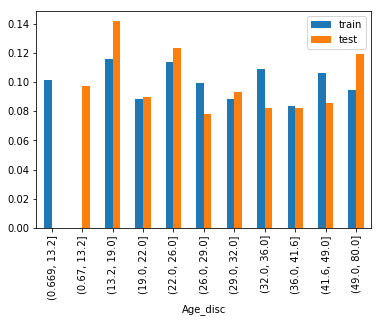

In [27]:
temp.plot.bar()

Indeed, we see roughly the same frequency per interval in both training and testing set.

Text(0,0.5,'Survived')

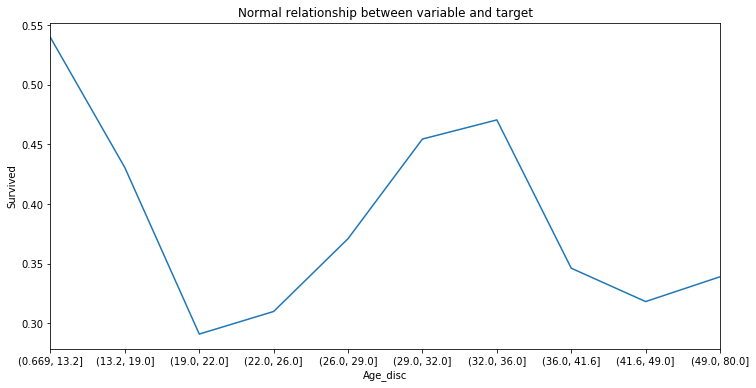

In [28]:
# and now let's observe the relationship between age and survival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Using discretisation we capture more clearly the survival rate according to the age of the passenger. We can see that children (<18) were the most likely to survive, and people in the early 30s as well, potentially mother with children, whereas people between 20-30 and older than 35 were the less likely to survive the tragedy.

Now that we have a discrete variable, we can go ahead and preprocess it as categorical variable, to squeeze a bit more performance out of the machine learning algorithm. Why not ordering the bins according to survival rate?

#### Combine discretisation with label ordering according to target

You can revise the lectures on engineering categorical variables to re-cap on how to preprocess labels.

For this demonstration I will assign ordinal numbers to the different bins, according to the survival rate per bin.

In [29]:
# order the intervals according to survival rate
ordered_labels = X_train.groupby(['Age_disc_label'])['Survived'].mean().sort_values().index

# number the intervals according to survival rate
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

# remap the intervals to the encoded variable
X_train['Age_disc_ordered'] = X_train.Age_disc_label.map(ordinal_label)
X_test['Age_disc_ordered'] = X_test.Age_disc_label.map(ordinal_label)

X_train.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered
857,51.0000,26.5500,1,Q10,"(49.0, 80.0]",3
52,49.0000,76.7292,1,Q9,"(41.6, 49.0]",2
386,1.0000,46.9000,0,Q1,"(0.669, 13.2]",9
124,54.0000,77.2875,0,Q10,"(49.0, 80.0]",3
578,14.5000,14.4583,0,Q2,"(13.2, 19.0]",6


Text(0,0.5,'Survived')

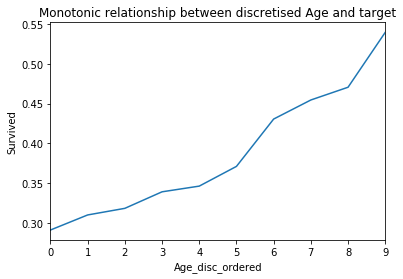

In [35]:
# plot the monotonic relationship
fig = plt.figure()
fig = X_train.groupby(['Age_disc_ordered'])['Survived'].mean().sort_values(ascending = True).plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

Go ahead and compare the performance machine learning algorithms using the original distribution of Age, Age discretised using quantiles and Age in quantiles followed by ordering according to Survival rate. Enjoy!

### 5.2.2. Fare

Let's look at the benefit that can be bought forward by equal frequency discretisation on highly skewed variables like Fare.

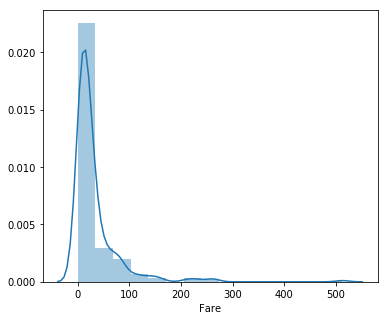

In [36]:
plt.figure(figsize=(6,5))
sns.distplot(df2['Fare'], kde=True, bins=15)

Text(0,0.5,'Survived')

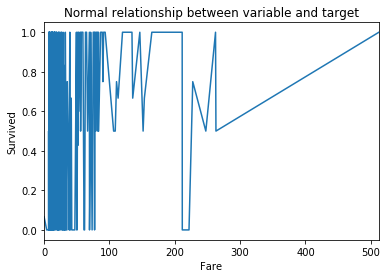

In [37]:
# let's plot survival rate per ticket price
fig = plt.figure()
fig = df2.groupby(['Fare'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

The relationship between Fare and survival is not very clear from this plot. It looks very noisy for the lowest fares, and the survival rate was highest for highest fares, however, there were very few people that paid > 500 dollars, so most likely that survival rate is inflated.

Let's go ahead and discretise Fare using equal frequency intervals, and plot again the survival rate and the number of observations within bins.

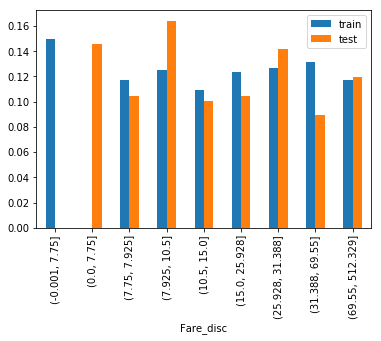

In [38]:
# calculate quantile boundaries on train set and create the discrete variable
X_train['Fare_disc'], bins = pd.qcut(x=X_train.Fare, q=8, retbins=True, precision=3, duplicates='raise')

# cut test set using bin boundaries estimated above
X_test['Fare_disc'] = pd.cut(x = X_test.Fare, bins=bins)

# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
t1 = X_train.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()

Indeed, we have now spread the observations evenly for all the intervals in both train and test set. Let's go ahead and plot the survival rate per Fare once again.

Text(0,0.5,'Survived')

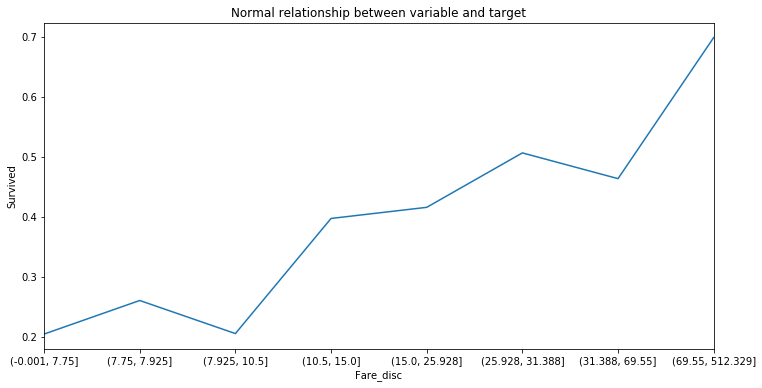

In [39]:
# let's plot survival rate per ticket price bin
fig = plt.figure()
fig = X_train.groupby(['Fare_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Now we get a much clearer view and as we have similar amount of passengers within each bucket, we can be confident that the conclusions are fair. We can see, clearly, that people that paid the highest Fares (>68 dollars) were the most likely to survive, and people who paid the lowest Fares (<10 dollars) were the less likely to survive. Sad but true.

## 5.3. Equal width discretisation

Equal width binning divides the scope of possible values into N bins of the same width. **The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable**.

width = (max value - min value) / N

For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

There is no rule of thumb to define N. Typically, we would not want more than 10.

I will demonstrate how to perform equal width binning using the Titanic dataset.

### 5.3.1. Age

#### Original distribution

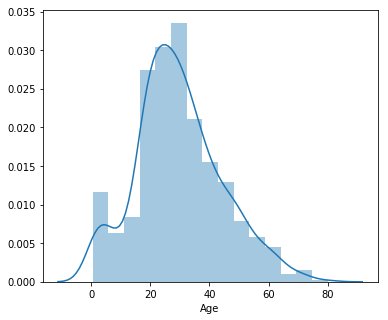

In [40]:
plt.figure(figsize=(6,5))
sns.distplot(df2['Age'], kde=True, bins=15)

**How does survival correlate with Age?**

We can determine the relation between survival and Age by plotting the mean survival per Age. In this case, I will calculate the Survival rate per each year of Age. See below.

Text(0,0.5,'Survived')

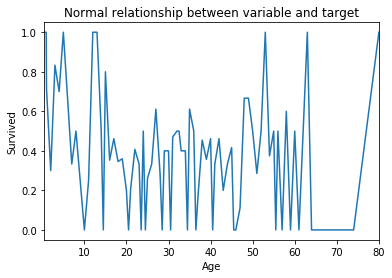

In [41]:
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

By looking at the plot, we get an intuition that younger people (children) were more likely to survive (see higher survival rates at ages below 10 and 10-15). However, it looks like children of 10 years of age, had a very low survival chance. This does not make a lot of sense and most likely indicates that our 10 year old sample is not big enough and then the survival rate is underestimated. Let's see below.

Text(0,0.5,'Survived')

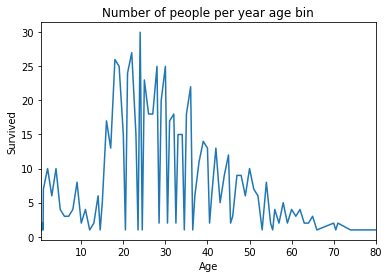

In [42]:
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].count().plot()
fig.set_title('Number of people per year age bin')
fig.set_ylabel('Survived')

As we suspected, there were very few children at the age of 10 on the Titanic. If none of them or only half of the 10 year old children survived, we would be led to think that being 10 years old decreased your chances of survival, when in reality, there were only 2 children of the age that were not lucky enough  to survive, therefore leading to underestimation of survival rate.

By grouping Age into bins, we can get a better view of the survival rate depending on the Age of the passenger. Let's see below.

#### Discretisation with range

In [44]:
# let's capture the range of the variable age to begin with

Age_range = X_train.Age.max() - X_train.Age.min()
Age_range

79.33

In [45]:
# let's divide the range into 10 equal width bins

Age_range/10

7.933

The range or width of our intervals will be 8 years.

In [46]:
# not let's capture the lower and upper boundaries

min_value = int(np.floor(X_train.Age.min()))
max_value = int(np.ceil(X_train.Age.max()))

# let's round the bin width
inter_value = int(np.round(Age_range/10))

min_value, max_value, inter_value

(0, 80, 8)

In [47]:
# let's capture the interval limits, so we can pass them to the pandas cut function to generate
# the bins

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

In [48]:
# let's make labels to label the different bins
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10']

In [49]:
# create binned age

# create one column with labels
X_train['Age_disc_labels'] = pd.cut(x = X_train.Age, bins=intervals, labels=labels, include_lowest=True)

# and one with bin boundaries
X_train['Age_disc'] = pd.cut(x = X_train.Age, bins=intervals, include_lowest=True)

X_train.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered,Fare_disc,Age_disc_labels
857,51.0000,26.5500,1,Q10,"(48.0, 56.0]",3,"(25.928, 31.388]",Bin_7
52,49.0000,76.7292,1,Q9,"(48.0, 56.0]",2,"(69.55, 512.329]",Bin_7
386,1.0000,46.9000,0,Q1,"(-0.001, 8.0]",9,"(31.388, 69.55]",Bin_1
124,54.0000,77.2875,0,Q10,"(48.0, 56.0]",3,"(69.55, 512.329]",Bin_7
578,14.5000,14.4583,0,Q2,"(8.0, 16.0]",6,"(10.5, 15.0]",Bin_2


We can see in the above output how by discretising using equal width, we placed each Age observation within one interval /bin. For example, age 51 was placed in the 48-56 interval, whereas age 14.5 was placed into the 8-16 interval.

Because we discretised the variable using equal width intervals instead of equal frequency, there won't necessarily be the same amount of passengers in each of the intervals. See below.

In [50]:
X_train.groupby('Age_disc')['Age'].count()

Age_disc
(-0.001, 8.0]     49
(8.0, 16.0]       36
(16.0, 24.0]     147
(24.0, 32.0]     146
(32.0, 40.0]     112
(40.0, 48.0]      68
(48.0, 56.0]      37
(56.0, 64.0]      19
(64.0, 72.0]       7
(72.0, 80.0]       2
Name: Age, dtype: int64

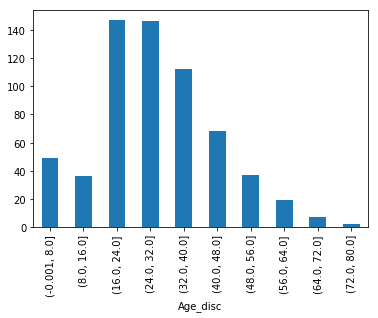

In [51]:
X_train.groupby('Age_disc')['Age'].count().plot.bar()

The majority of people on the Titanic were between 16-40 years of age.

Now, we can discretise Age in the test set, using the same interval boundaries that we calculated for the train set. See below.

In [52]:
X_test['Age_disc_labels'] = pd.cut(x = X_test.Age, bins=intervals, labels=labels, include_lowest=True)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=intervals,  include_lowest=True)

X_test.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered,Fare_disc,Age_disc_labels
495,42.0000,14.4583,0,Q9,"(40.0, 48.0]",2,"(10.5, 15.0]",Bin_6
648,18.0000,7.5500,0,Q2,"(16.0, 24.0]",6,"(0.0, 7.75]",Bin_3
278,7.0000,29.1250,0,Q1,"(-0.001, 8.0]",9,"(25.928, 31.388]",Bin_1
31,35.0000,146.5208,1,Q7,"(32.0, 40.0]",8,"(69.55, 512.329]",Bin_5
255,29.0000,15.2458,1,Q5,"(24.0, 32.0]",5,"(15.0, 25.928]",Bin_4


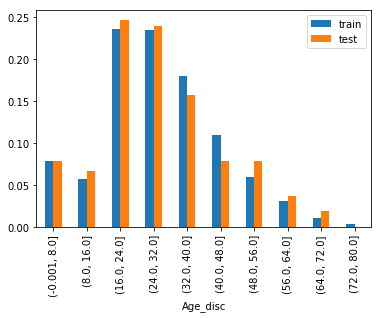

In [53]:
# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
# let's see that below

t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()


Indeed, the proportion of passengers within each bin is roughly the same.

Text(0,0.5,'Survived')

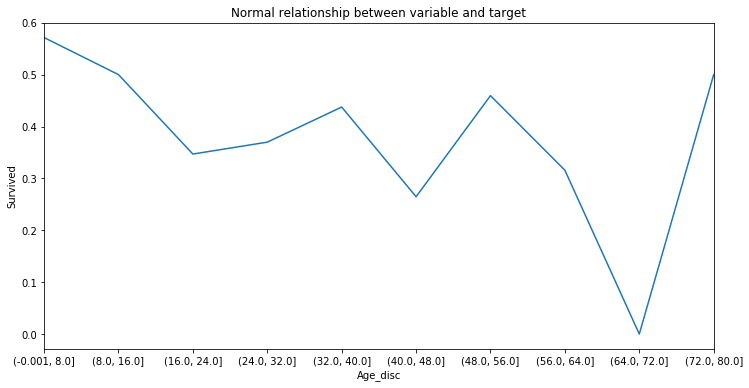

In [54]:
# and now let's observe the relationship between age and surival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0,0.5,'No of Passengers')

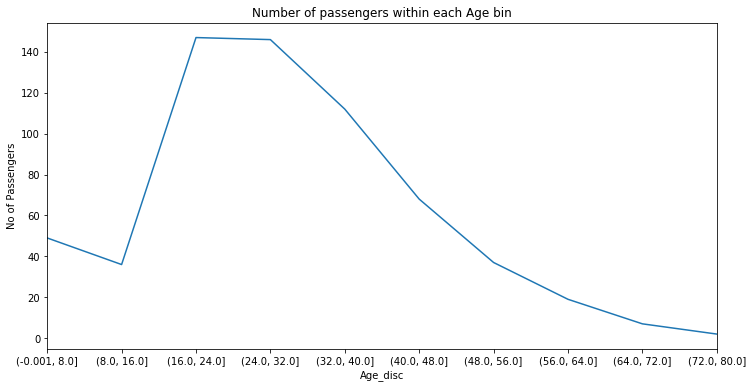

In [55]:
fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].count().plot(figsize=(12,6))
fig.set_title('Number of passengers within each Age bin')
fig.set_ylabel('No of Passengers')

In this case, by dividing Age into bins, we removed some of the noise plotted in the previous graph (a few cells ago) using the untransformed Age. Using the discrete variable Age, we observe as expected that children (<16) had the highest survival chance.

What happens to older people is less clear from the discrete variable. It looks like people between 32-40 and 48-56 are more likely to survive, than people from 40-48. This might or might not be true and more research would be needed to determine if this was the case, what the reason behind it was. In addition, it looks like being extremely old, was very favourable for survival (look at the 72-80 bucket). However, most likely, these are consequences of an arbitrary binning strategy. There are very few people in the bucket 72-80, and thus, the fact that 1 of them survived inflates (overestimates) the survival rate for that bucket. And the same is true for the remaining of the bins, the lowest the amount of observations within buckets, the highest the risk of over or underestimating the target (survival in this case). So we begin to see some of the consequences of this binning strategy.

Similarly to what we did with the equal frequency discretised Age variable in the previous lecture, here as well to squeeze a bit more performance out of the machine learning algorithm, we can add a layer of transformation by sorting the bins using the survival rate (the caveat being that the survival rate may be over or underestimated as we explained in the previous paragraph). But just for a demonstration, let's go ahead. See below.

#### Combine discretisation with label ordering according to target

You can revise the lectures on engineering categorical variables to re-cap on how to preprocess labels.

For this demonstration I will assign ordinal numbers to the different bins, according to the survival rate per bin.

In [56]:
# order the bins according to survival rate
ordered_labels = X_train.groupby(['Age_disc_labels'])['Survived'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}

# transformed the discrete age variable
X_train['Age_disc_ordered'] = X_train.Age_disc_labels.map(ordinal_label)
X_test['Age_disc_ordered'] = X_test.Age_disc_labels.map(ordinal_label)

Text(0,0.5,'Survived')

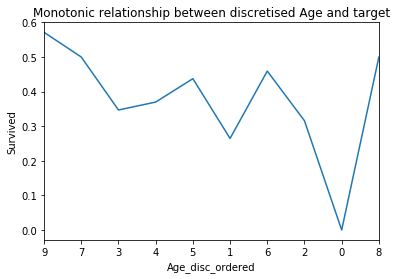

In [57]:
fig = plt.figure()
fig = X_train.groupby(['Age_disc_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

### 5.3.2. Fare

Let's look at the consequences of equal width discretisation on highly skewed variables like Fare.

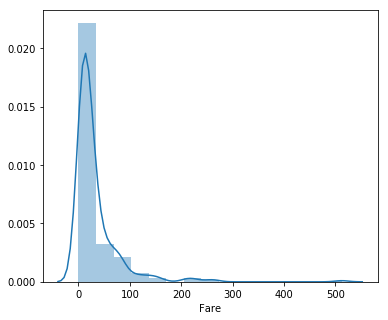

In [59]:
plt.figure(figsize=(6,5))
sns.distplot(X_train['Fare'], kde=True, bins=15)

In [60]:
Fare_range = X_train.Fare.max() - X_train.Fare.min()
Fare_range

512.3292

In [61]:
min_value = int(np.floor(X_train.Fare.min()))
max_value = int(np.ceil(X_train.Fare.max()))
inter_value = int(np.round(Fare_range/10))

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 51, 102, 153, 204, 255, 306, 357, 408, 459, 510, 561]

In [62]:
len(intervals)

12

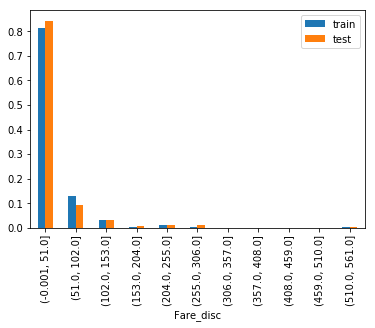

In [63]:
X_train['Fare_disc'] = pd.cut(x = X_train.Fare, bins=intervals, include_lowest=True)
X_test['Fare_disc'] = pd.cut(x = X_test.Fare, bins=intervals, include_lowest=True)

# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
t1 = X_train.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()

For very skewed variables, discretisation using range is not a good option, as it ends up putting the majority of the observations within 1 or 2 buckets, and the remaining are almost empty or empty.

For very skewed variables, quantile discretisation may be a better choice.

## 5.4. Domain knowledge discretisation

Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. These intervals may be defined both arbitrarily or following some criteria of use to the business. Typical examples are the discretisation of variables like Age and Income. 

Income for example is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per Age, it is usually divided in certain groups according to the business need, for example division into  0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.

### 5.4.1. Age

#### Original distribution

In [64]:
df2.Age.describe()

count   714.0000
mean     29.6991
std      14.5265
min       0.4200
25%      20.1250
50%      28.0000
75%      38.0000
max      80.0000
Name: Age, dtype: float64

In [66]:
# let's divide Age into the buckets that we described in the intro cell

# bucket boundaries
buckets = [0,20,40,60,1000]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
df2['Age_buckets_labels'] = pd.cut(df2.Age, bins=buckets, labels = labels, include_lowest=True)
df2['Age_buckets'] = pd.cut(df2.Age, bins=buckets, include_lowest=True)

df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_buckets_labels,Age_buckets
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,20-40,"(20.0, 40.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,20-40,"(20.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,"(20.0, 40.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,20-40,"(20.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,20-40,"(20.0, 40.0]"


In [67]:
df2.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_buckets_labels,Age_buckets
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S,20-40,"(20.0, 40.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S,0-20,"(-0.001, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C,20-40,"(20.0, 40.0]"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.7500,NaN,Q,20-40,"(20.0, 40.0]"


Above we can observe the buckets into which each Age observation was placed. For example, age 27 was placed into the 20-40 bucket.

Let's explore the number of observations and survival rate per bucket after this arbitrary discretisation method.

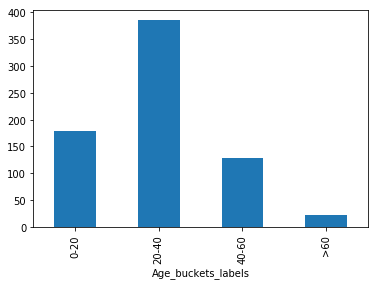

In [68]:
# number of passengers per age bucket
df2.groupby('Age_buckets_labels')['Age'].count().plot.bar()

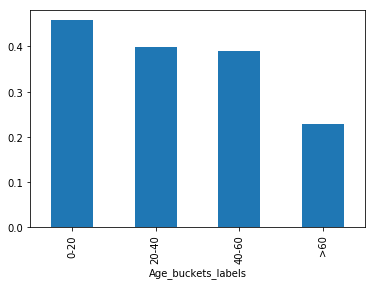

In [69]:
# survival rate per age bucket
df2.groupby('Age_buckets_labels')['Survived'].mean().plot.bar()

The majority of people on the Titanic were between 20-40 years of age. We can see that all the age bins have the same Survival rate. Therefore, most likely, this is not a good method of grouping the Age variable to improve model predictive performance.

**So when would we use a discretisation method like this?**

Well for example, if the business was organising marketing campaigns, and they decide that they will run 4 different marketing campaigns each one targeting each of this buckets, then, dividing age into these groups makes sense for further analysis.

### 5.4.2. annual_inc (Lending Club)

Let's explore discretisation using domain knowledge in a different business scenario. I will use the loan book from the peer to peer lending company Lending Club. This dataset contains information on loans given to people, and the financial characteristics of those people as well as the loan performance.

In [10]:
# I will load only the income declared by the borrower for the demonstration

data = pd.read_csv('loan.csv', usecols=['annual_inc'])
data.head()

,annual_inc
0,24000.0
1,30000.0
2,12252.0
3,49200.0
4,80000.0


In [11]:
data.annual_inc.describe()

count    8.873750e+05
mean     7.502759e+04
std      6.469830e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

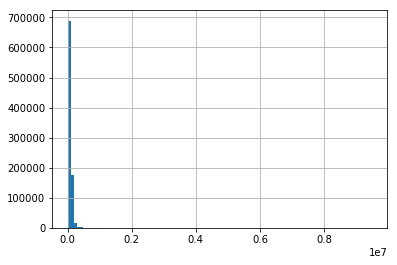

In [12]:
# let's inspect the distribution of Incomes
data.annual_inc.hist(bins=100)

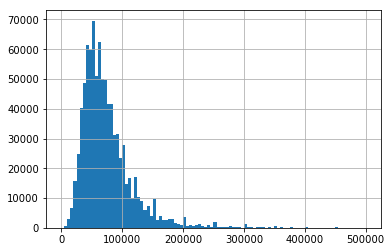

In [13]:
# and now let's look at the lower incomes in more detail
data[data.annual_inc<500000].annual_inc.hist(bins=100)

We can see that the majority of the population earns below 150,000. So we may want to make a cap there.

In [14]:
data[data.annual_inc<500000].describe()

,annual_inc
count,886115.000000
mean,73900.859540
std,43818.534502
min,0.000000
25%,45000.000000
50%,64609.000000
75%,90000.000000
max,499992.000000


In [15]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [0,45000,65000,90000,150000,1e10]

# bucket labels
labels = ['0-45k', '45-65k', '65-90k','90-150k', '>150k']

# discretisation
data['Income_buckets'] = pd.cut(data.annual_inc, bins=buckets, labels = labels, include_lowest=True)
data.head()

,annual_inc,Income_buckets
0,24000.0,0-45k
1,30000.0,0-45k
2,12252.0,0-45k
3,49200.0,45-65k
4,80000.0,65-90k


In [16]:
data.tail()

,annual_inc,Income_buckets
887374,31000.0,0-45k
887375,79000.0,65-90k
887376,35000.0,0-45k
887377,64400.0,45-65k
887378,100000.0,90-150k


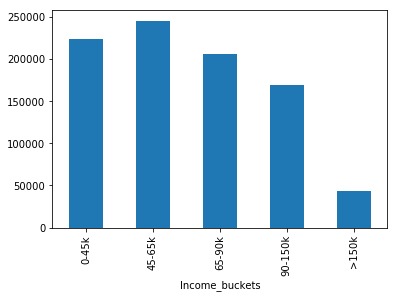

In [17]:
data.groupby(['Income_buckets'])['annual_inc'].count().plot.bar()

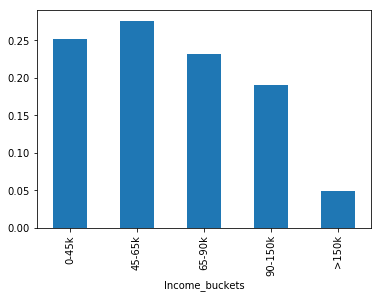

In [18]:
(data.groupby(['Income_buckets'])['annual_inc'].count()/np.float(len(data))).plot.bar()

We  have captured ~equal amount of borrowers in each of the first 3 buckets, and we see clearly, that a smaller percentage of the loans were disbursed to high earners.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

## 5.5. Discretisation with Decision Trees

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values. **Supervised discretisation** methods use target information to create the contiguous bins or intervals. Several supervised discretisation methods have been described, see for example the article [Discretisation: An Enabling technique](http://www.public.asu.edu/~huanliu/papers/dmkd02.pdf) for a summary.

However, I have only seen the discretisation using decision trees being used both in Data Science competitions and business settings:

Discretisation using trees was implemented by the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

It is also used in a peer to peer lending company in the UK. See this [blog](https://blog.zopa.com/2017/07/20/tips-honing-logistic-regression-models/) for details of the benefit of using  discretisation using decision trees.


Discretisation with Decision Trees consists of using a decision tree to identify the optimal splitting points that would determine the bins or contiguous intervals: 
- First, it trains a decision tree of limited depth (2, 3  or 4) using the variable we want to discretise to predict the target.
- The original variable values are then replaced by the probability returned by the tree. The probability is the same for all the observations within a single bin, thus replacing by the probability is equivalent to grouping the observations within the cut-off decided by the decision tree.

### Advantages

- The probabilistic predictions returned decision tree are monotonically related to the target.
- The new bins show decreased entropy, this is the observations within each bucket / bin are more similar to themselves than to those of other buckets / bins.
- The tree finds the bins automatically

### Disadvantages
- It may cause over-fitting
- More importantly, some tuning of tree parameters need to be done to obtain the optimal splits (e.g., depth, minimum number of samples in one partition, maximum number of partitions, and a minimum information gain). This it can be time consuming.


Below, I will demonstrate how to perform discretisation with decision trees using the Titanic dataset.

### Titanic dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score

In [2]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### Important:

The tree should be built using the training dataset, and then used to replace the same feature in the testing dataset, to avoid over-fitting.

In [3]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare', 'Survived']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

### Remove Missing Data

The variable Age contains missing data, that I will fill by extracting a random sample of the variable.

In [4]:
def impute_na(data, variable):
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [5]:
X_train['Age'] = impute_na(data, 'Age')
X_test['Age'] = impute_na(data, 'Age')

### Age

In [6]:
X_train.head()

,Age,Fare,Survived
857,51.0,26.5500,1
52,49.0,76.7292,1
386,1.0,46.9000,0
124,54.0,77.2875,0
578,14.5,14.4583,0


In [7]:
# example: build Classification tree using Age to predict Survived

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Survived)
X_train['Age_tree'] = tree_model.predict_proba(X_train.Age.to_frame())[:,1]
X_train.head(10)

,Age,Fare,Survived,Age_tree
857,51.0,26.5500,1,0.370849
52,49.0,76.7292,1,0.370849
386,1.0,46.9000,0,0.516667
124,54.0,77.2875,0,0.370849
578,14.5,14.4583,0,0.818182
549,8.0,36.7500,1,0.516667
118,24.0,247.5208,0,0.370849
12,20.0,8.0500,0,0.370849
157,30.0,8.0500,0,0.370849
127,24.0,7.1417,1,0.370849


In [8]:
X_train.Age_tree.unique()

array([ 0.37084871,  0.51666667,  0.81818182,  0.1       ])

A tree of depth 2, makes 2 splits, therefore generating 4 buckets, that is why we  see 4 different probabilities in the output above.

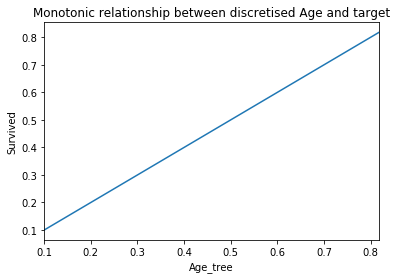

In [9]:
# monotonic relationship with target

fig = plt.figure()
fig = X_train.groupby(['Age_tree'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

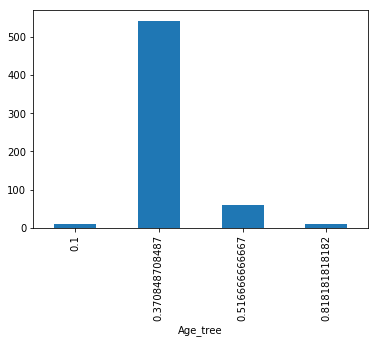

In [10]:
# number of passengers per probabilistic bucket / bin

X_train.groupby(['Age_tree'])['Survived'].count().plot.bar()

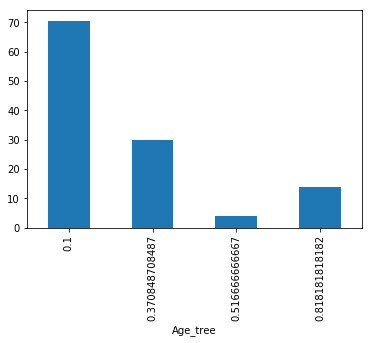

In [11]:
# median age within each bucket originated by the tree

X_train.groupby(['Age_tree'])['Age'].median().plot.bar()

In [12]:
# let's see the Age limits buckets generated by the tree
# by capturing the minimum and maximum age per each probability bucket, 
# we get an idea of the bucket cut-offs

pd.concat( [X_train.groupby(['Age_tree'])['Age'].min(),
            X_train.groupby(['Age_tree'])['Age'].max()], axis=1)

,Age,Age
Age_tree,,
0.100000,64.00,80.0
0.370849,16.00,63.0
0.516667,0.67,11.0
0.818182,12.00,15.0


Thus, the decision tree generated the buckets: 0-11, 12-15, 16-63 and 46-80, with probabilities of survival of .51, .81, .37 and .1 respectively.

### Tree visualisation

In [13]:
# we can go ahead and visualise the tree by saving the model to a file, and opening that file in the below indicated link

with open("tree_model.txt", "w") as f:
    f = export_graphviz(tree_model, out_file=f)

#http://webgraphviz.com

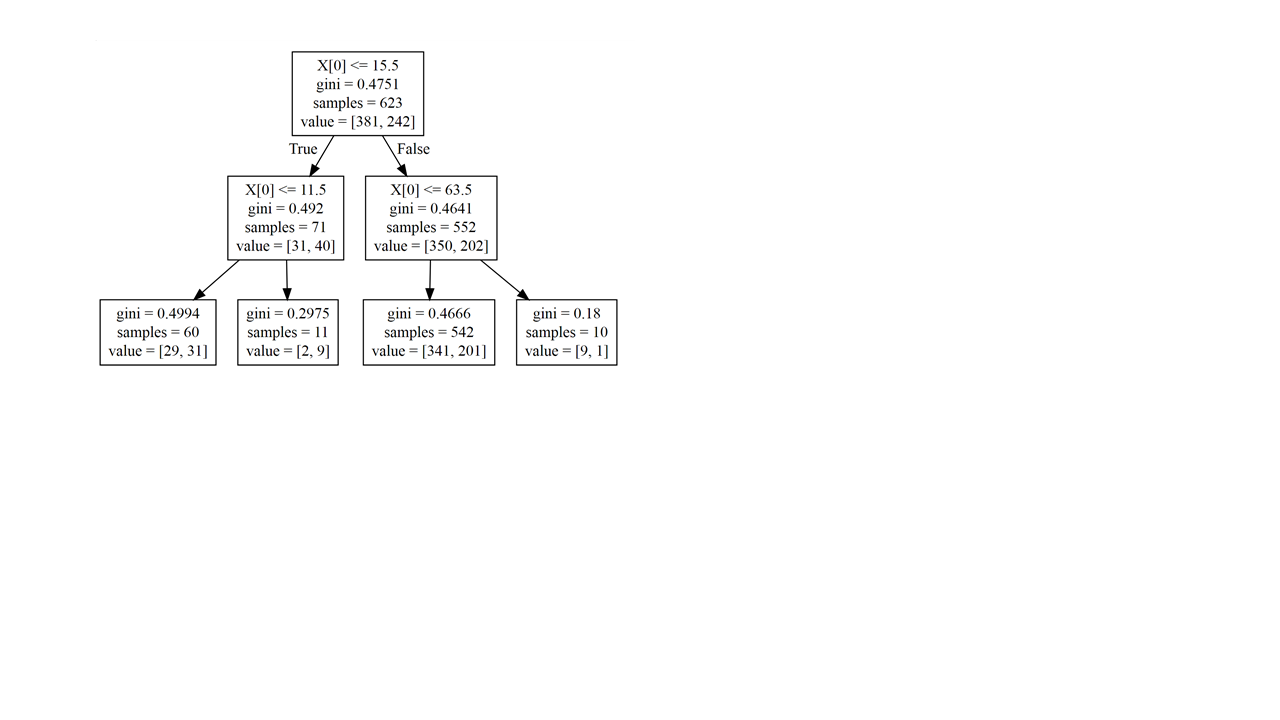

In [14]:
# this is what you should see if you do what is described in the previous cell
# the  plot indicates  the age cut-offs at each node, and also the number of samples at each node, and 
# the gini

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "tree_visualisation.png"
Image(filename = PATH , width=1000, height=1000)

### Select the optimal depth

As I mentioned earlier, there are a number of parameters that you could optimise to obtain the best bin split using decision trees. Below I will optimise the tree depth for a demonstration. But remember that you could also optimise the remaining parameters of the decision tree. Visit [sklearn website](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to see which other parameters can be optimised.


In [15]:
# I will build trees of different depths, and I will calculate the roc-auc determined for the variable and
# the target for each tree
# I will then choose the depth that generates the best roc-auc

score_ls = [] # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc

for tree_depth in [1,2,3,4]:
    # call the model
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    # train the model using 3 fold cross validation
    scores = cross_val_score(tree_model, X_train.Age.to_frame(), y_train, cv=3, scoring='roc_auc')
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
temp

,depth,roc_auc_mean,roc_auc_std
0,1,0.524929,0.011327
1,2,0.522882,0.014414
2,3,0.517628,0.013480
3,4,0.518913,0.007791


We obtain the best roc-auc using depths of 1 or 2. I will select depth of 2 to proceed.

### Transform the feature using tree

In [16]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Survived)
X_train['Age_tree'] = tree_model.predict_proba(X_train.Age.to_frame())[:,1]
X_test['Age_tree'] = tree_model.predict_proba(X_test.Age.to_frame())[:,1]

We are now ready to use those pre-processed Age features in machine learning algorithms. Why don't you go ahead and test them?

In [17]:
# let's inspect the transformed variables in train set
X_train.head()

,Age,Fare,Survived,Age_tree
857,51.0,26.5500,1,0.370849
52,49.0,76.7292,1,0.370849
386,1.0,46.9000,0,0.516667
124,54.0,77.2875,0,0.370849
578,14.5,14.4583,0,0.818182


In [18]:
# let's inspect the transformed variables in test set

X_test.head()

,Age,Fare,Survived,Age_tree
495,42.0,14.4583,0,0.370849
648,18.0,7.5500,0,0.370849
278,7.0,29.1250,0,0.516667
31,35.0,146.5208,1,0.370849
255,29.0,15.2458,1,0.370849


In [19]:
# and the unique values of each bin (train)
X_train.Age_tree.unique()

array([ 0.37084871,  0.51666667,  0.81818182,  0.1       ])

In [20]:
# and the unique values of each bin (test)

X_test.Age_tree.unique()

array([ 0.37084871,  0.51666667,  0.81818182,  0.1       ])

### Fare

### Select the optimal depth

Let's repeat the exercise with the variable Fare. Remember that fare was highly skewed and therefore would benefit from engineering to spread the information more evenly.

In [21]:
score_ls = []
score_std_ls = []
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Fare.to_frame(), y_train, cv=3, scoring='roc_auc')
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
temp

,depth,roc_auc_mean,roc_auc_std
0,1,0.609106,0.023418
1,2,0.662132,0.026253
2,3,0.647950,0.045010
3,4,0.650984,0.035127


In this case, the best split roc_auc is obtained with a tree of depth 2, thus I will choose this one to proceed.

In [22]:
# train the decision tree and engineer Fare in train and test set
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Fare.to_frame(), X_train.Survived)
X_train['Fare_tree'] = tree_model.predict_proba(X_train.Fare.to_frame())[:,1]
X_test['Fare_tree'] = tree_model.predict_proba(X_test.Fare.to_frame())[:,1]

In [23]:
X_train['Fare_tree'].unique()

array([ 0.44230769,  0.74626866,  0.25531915,  0.10714286])

In [24]:
X_test['Fare_tree'].unique()

array([ 0.44230769,  0.25531915,  0.74626866,  0.10714286])

In [25]:
# let's see what are the Fare cut-offs within each bin
pd.concat( [X_train.groupby(['Fare_tree'])['Fare'].min(),
            X_train.groupby(['Fare_tree'])['Fare'].max()], axis=1)

,Fare,Fare
Fare_tree,,
0.107143,0.0000,7.5208
0.255319,7.5500,10.5000
0.442308,11.1333,73.5000
0.746269,75.2500,512.3292


The tree generated 4 bins: 0-7.5, 7.5-10.5, 11-73 and > 73, each with probability of survival .1, .25, .44 and .75 respectively. Indicating that people that paid higher fares, where more likely to survive. 

In [26]:
# and with this sequence of steps, we can visualise the tree

with open("tree_model.txt", "w") as f:
    f = export_graphviz(tree_model, out_file=f)

#http://webgraphviz.com

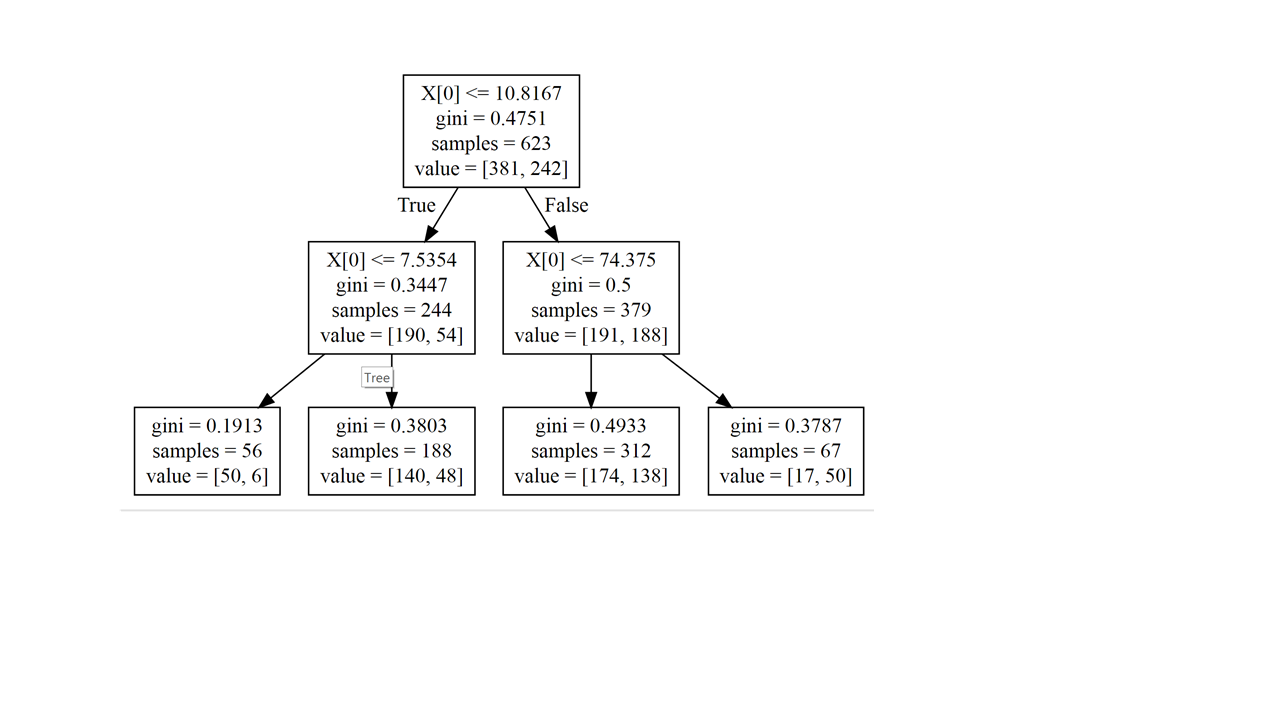

In [27]:
PATH = "tree_fare.png"
Image(filename = PATH , width=1000, height=1000)

## Discretisation with trees on categorical variables

Discretisation using trees can also be used on categorical variables, to capture some insight into how well they predict the target.

In [28]:
# let's load the categorical variable cabin from the titanic
data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])

# let's fill na with a new category missing
data.Cabin.fillna('Missing', inplace=True)

# and let's capture just the first letter of the cabin, ignoring the number of the cabin
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [29]:
data.groupby('Cabin')['Survived'].count() / np.float(len(data))

Cabin
A    0.016835
B    0.052750
C    0.066218
D    0.037037
E    0.035915
F    0.014590
G    0.004489
M    0.771044
T    0.001122
Name: Survived, dtype: float64

We can see that cabins A, F, G and T show a low frequency of passengers, so I will re group them into a 'Rare' Category to avoid over-fitting.

In [30]:
data['Cabin'] = np.where(data.Cabin.isin(['A', 'F', 'G', 'T']), 'Rare', data.Cabin)

data.groupby('Cabin')['Survived'].count() / np.float(len(data))

Cabin
B       0.052750
C       0.066218
D       0.037037
E       0.035915
M       0.771044
Rare    0.037037
Name: Survived, dtype: float64

In [31]:
# lets replace the letters by numbers, without any sort of order

cabin_dict = {k:i for i, k in enumerate(data.Cabin.unique(), 0)} 
data.loc[:, 'Cabin'] = data.loc[:, 'Cabin'].map(cabin_dict)
data.head()

,Survived,Cabin
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0


In [32]:
# let's inspect how the new cabin looks like
data.Cabin.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

### Optimise depth

In [33]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [34]:
# and now we optimise a tree split on it as we did for numerical variables

score_ls = []
score_std_ls = []
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Cabin.to_frame(), y_train, cv=3, scoring='roc_auc')
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
temp

,depth,roc_auc_mean,roc_auc_std
0,1,0.634922,0.021348
1,2,0.635294,0.022767
2,3,0.634844,0.020574
3,4,0.637038,0.020460


In [35]:
# I will proceed with depth = 2

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Cabin.to_frame(), X_train.Survived)
X_train['Cabin_tree'] = tree_model.predict_proba(X_train.Cabin.to_frame())[:,1]
X_test['Cabin_tree'] = tree_model.predict_proba(X_test.Cabin.to_frame())[:,1]

In [36]:
# the output creates 3 bins instead of 4, why is that?
X_train.Cabin_tree.unique()

array([ 0.6       ,  0.73684211,  0.30360934])

In [37]:
# the output creates 3 bins instead of 4, why is that?
X_test.Cabin_tree.unique()

array([ 0.30360934,  0.73684211,  0.6       ])

In [38]:
with open("tree_model.txt", "w") as f:
    f = export_graphviz(tree_model, out_file=f)

#http://webgraphviz.com

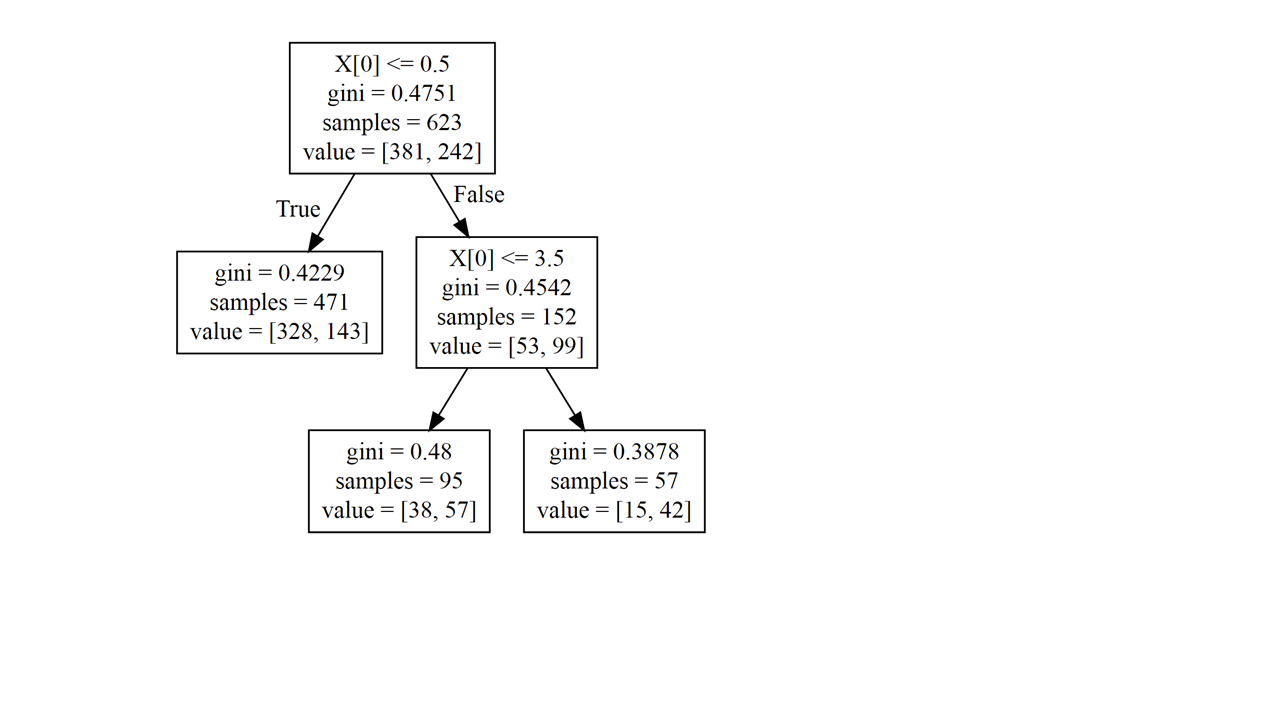

In [39]:
PATH = "tree_cabin.png"
Image(filename = PATH , width=1000, height=1000)

As we can see from the plot, we only obtain 3 bins, because the first split resulted already in a final node on the left.

In [40]:
# let's see what are the Fare cut-offs within each bin
pd.concat( [X_train.groupby(['Cabin_tree'])['Cabin'].min(),
            X_train.groupby(['Cabin_tree'])['Cabin'].max()], axis=1)

,Cabin,Cabin
Cabin_tree,,
0.303609,0,0
0.600000,1,3
0.736842,4,5


The decision tree has found these buckets as the optimal ones: Cabins 0, 1-3 and 4-5, with probability of survival .3, .6 and .73 respectively.

Amazing, no?

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**